In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 
from keras.layers import Input, Flatten, GlobalAveragePooling2D



In [107]:
mc_pion = pd.read_csv("Pion_300MeV_500000_1photon_0plus.txt")
mc_compton = pd.read_csv("Compton_300MeV_20000_1photon_0plus.txt")
###########################################################################
#mc_pion = pd.read_csv("Pion_1p1g_300MeV_recon_test.txt")
#mc_compton = pd.read_csv("Compton_300MeV_recon_test.txt")
###########################################################################
#mc_pion = pd.read_csv("AcquMC_proton_Pion_Photon1_300MeV_10000.txt")
#mc_compton = pd.read_csv("AcquMC_proton_Compton_300MeV_10000.txt")
#mc_compton.head()

mc_compton['id'] = mc_compton['id'].replace([2], 1)
mc_pion['id'] = mc_pion['id'].replace([2], 0)

mc_sum = mc_compton.append(mc_pion, ignore_index=True)

mc_sum.head()
mc_sum.drop(["E_beam"], axis = 1, inplace = True)
mc_sum.drop(["phi_gamma"], axis = 1, inplace = True)
#################
#mc_sum.drop(["phi_p"], axis = 1, inplace = True)
#mc_sum.drop(["E_p"], axis = 1, inplace = True)
################
mc_sum_reshuffle2 = mc_sum.sample(frac = 1).reset_index()
mc_sum_reshuffle2.drop("index", axis =1, inplace = True)
#mc_sum.drop(["phi_p"], axis = 1, inplace = True)

mc_sum_reshuffle2 = mc_sum_reshuffle2[mc_sum_reshuffle2["theta_gamma"] > 40.]
mc_sum_reshuffle2 = mc_sum_reshuffle2[mc_sum_reshuffle2["theta_gamma"] < 140.]
mc_sum_reshuffle2 = mc_sum_reshuffle2[mc_sum_reshuffle2["MM"] < 1000.]
mc_sum_reshuffle2 = mc_sum_reshuffle2[mc_sum_reshuffle2["MM"] > 920.]

mc_sum_reshuffle3 = mc_sum_reshuffle2[np.isfinite(mc_sum_reshuffle2).all(1)]


C:\Users\Khach\AppData\Local\Temp\ipykernel_15480\3424536181.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mc_sum = mc_compton.append(mc_pion, ignore_index=True)


In [109]:
mc_sum_reshuffle2.head(20)

,E_gamma,theta_gamma,ncryst,MM,id
0,187.048,86.466,7,994.061,0
3,256.334,63.287,11,937.462,1
6,200.914,87.046,8,976.263,0
7,213.430,61.773,10,988.211,0
9,215.555,56.268,11,991.251,0
11,247.040,66.897,10,943.856,1
14,223.689,89.291,9,944.504,1
23,177.577,119.644,6,975.633,0
24,224.282,90.352,10,942.404,1
25,200.183,78.005,6,986.760,0


In [110]:
mc_sum_reshuffle3[mc_sum_reshuffle3.select_dtypes(np.float64).columns] = mc_sum_reshuffle3.select_dtypes(np.float64).astype(np.float32)


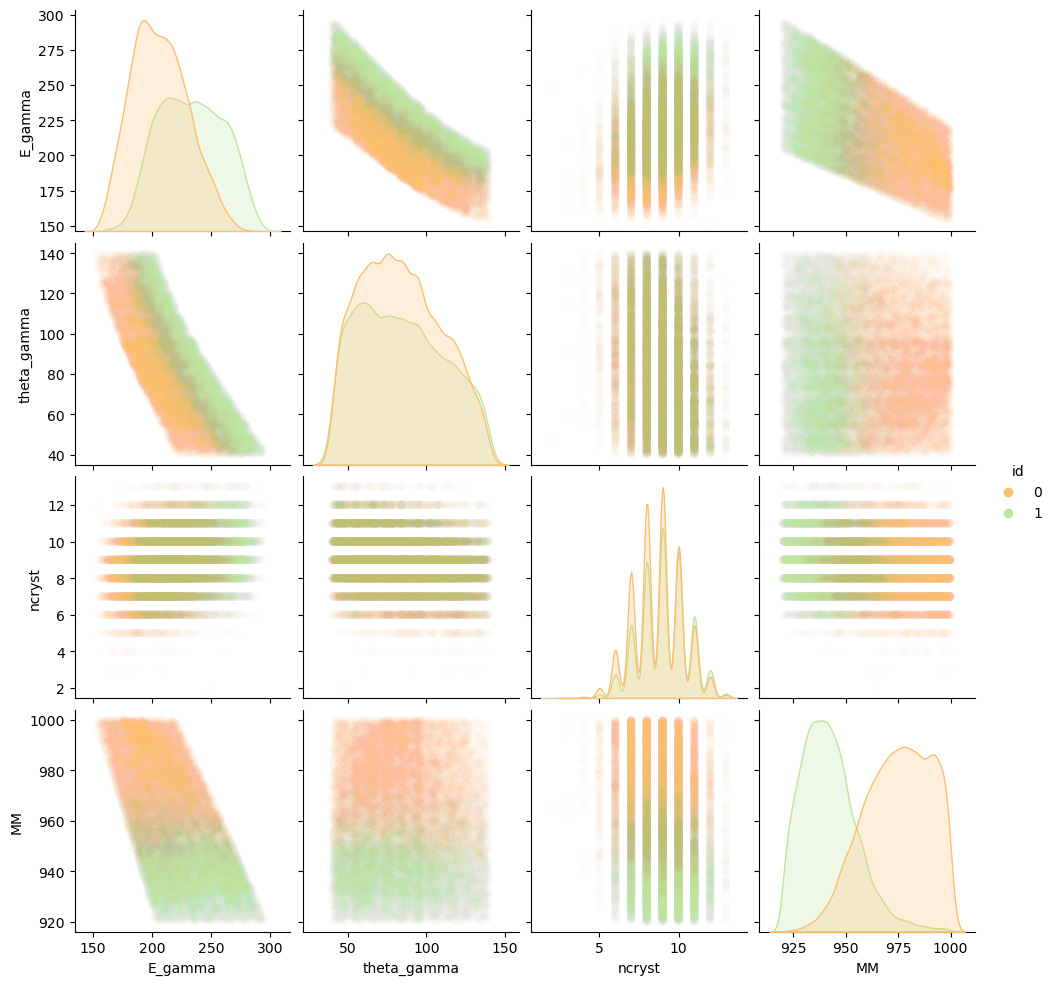

In [111]:
sns.pairplot(mc_sum_reshuffle2, hue = "id",  kind='scatter', plot_kws={'alpha':0.01}, palette='Spectral')

<AxesSubplot:>

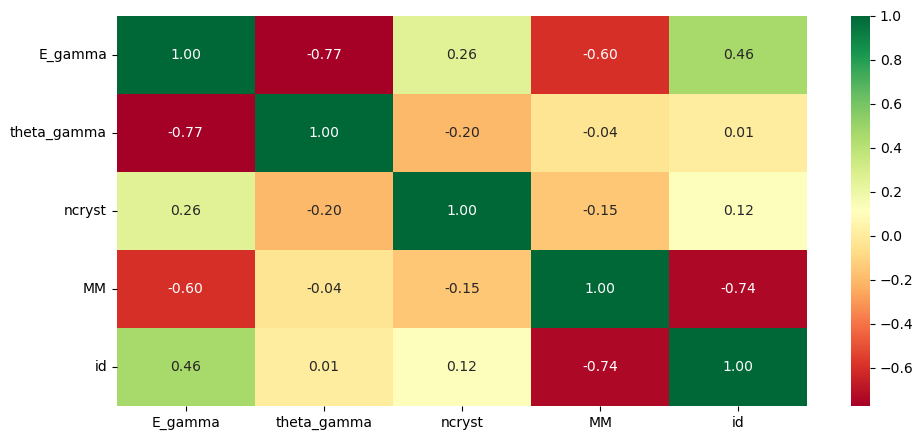

In [112]:
sns.heatmap(mc_sum_reshuffle3.corr(), annot = True, fmt='.2f', cmap='RdYlGn')

In [113]:

 # retrieve numpy array
dataset = mc_sum_reshuffle3.values
 # split into input (X) and output (y) variables
X = dataset[:,0 :4]
y = dataset[:,4]

In [114]:
mc_sum_reshuffle3

,E_gamma,theta_gamma,ncryst,MM,id
0,187.048004,86.466003,7,994.060974,0
3,256.334015,63.286999,11,937.461975,1
6,200.914001,87.045998,8,976.263000,0
7,213.429993,61.772999,10,988.210999,0
9,215.554993,56.268002,11,991.250977,0
...,...,...,...,...,...
88865,178.154007,96.861000,7,995.218018,0
88870,254.636993,41.068001,9,963.953979,0
88871,217.845001,59.687000,6,985.414001,0
88874,171.580002,102.973000,10,998.190002,0


In [115]:
X.dtype

dtype('float64')

In [118]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
####################
X_test_unscaled = X_test
# prepare input data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
#y_train

array([3818,  664, 2032, ..., 3710,  971,  934], dtype=int64)

In [119]:
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)
#y_train_enc = le.transform(np.ravel(y_train,order='C'))
#y_test_enc = le.transform(np.ravel(y_test,order='C'))

In [150]:
X_train

array([[0.        , 0.47830332, 0.39258113, 0.54545455, 0.54186468],
       [0.        , 0.61779557, 0.27353399, 0.54545455, 0.44030648],
       [0.        , 0.57349925, 0.43817625, 0.54545455, 0.34455609],
       ...,
       [0.        , 0.55311406, 0.47791618, 0.72727273, 0.33837123],
       [0.        , 0.40012191, 0.68601693, 0.45454545, 0.41798444],
       [0.        , 0.26139474, 0.76663339, 0.72727273, 0.61376798]])

In [120]:
model = Sequential()
model.add(Dense(5, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_normal'))
#model.add(Dense(5, activation='relu', kernel_initializer='he_normal'))
#model.add(Dense(2, activation='relu', kernel_initializer='he_normal'))
#model.add(Flatten())
#model.add(GlobalAveragePooling2D())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=2)
#model.history.history
# evaluate the keras model
#_, accuracy = model.evaluate(X_test, y_test, verbose=0)
#print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/200
1103/1103 - 5s - loss: 0.4762 - accuracy: 0.8043 - 5s/epoch - 5ms/step
Epoch 2/200
1103/1103 - 3s - loss: 0.3445 - accuracy: 0.8620 - 3s/epoch - 3ms/step
Epoch 3/200
1103/1103 - 3s - loss: 0.3312 - accuracy: 0.8618 - 3s/epoch - 3ms/step
Epoch 4/200
1103/1103 - 3s - loss: 0.3292 - accuracy: 0.8620 - 3s/epoch - 3ms/step
Epoch 5/200
1103/1103 - 3s - loss: 0.3289 - accuracy: 0.8621 - 3s/epoch - 3ms/step
Epoch 6/200
1103/1103 - 3s - loss: 0.3287 - accuracy: 0.8624 - 3s/epoch - 3ms/step
Epoch 7/200
1103/1103 - 3s - loss: 0.3287 - accuracy: 0.8617 - 3s/epoch - 3ms/step
Epoch 8/200
1103/1103 - 3s - loss: 0.3283 - accuracy: 0.8622 - 3s/epoch - 3ms/step
Epoch 9/200
1103/1103 - 3s - loss: 0.3286 - accuracy: 0.8621 - 3s/epoch - 3ms/step
Epoch 10/200
1103/1103 - 4s - loss: 0.3285 - accuracy: 0.8625 - 4s/epoch - 3ms/step
Epoch 11/200
1103/1103 - 3s - loss: 0.3283 - accuracy: 0.8624 - 3s/epoch - 3ms/step
Epoch 12/200
1103/1103 - 3s - loss: 0.3283 - accuracy: 0.8613 - 3s/epoch - 3ms/step
E

Epoch 99/200
1103/1103 - 4s - loss: 0.3283 - accuracy: 0.8617 - 4s/epoch - 4ms/step
Epoch 100/200
1103/1103 - 4s - loss: 0.3282 - accuracy: 0.8626 - 4s/epoch - 3ms/step
Epoch 101/200
1103/1103 - 4s - loss: 0.3283 - accuracy: 0.8621 - 4s/epoch - 3ms/step
Epoch 102/200
1103/1103 - 3s - loss: 0.3280 - accuracy: 0.8621 - 3s/epoch - 3ms/step
Epoch 103/200
1103/1103 - 4s - loss: 0.3284 - accuracy: 0.8619 - 4s/epoch - 4ms/step
Epoch 104/200
1103/1103 - 4s - loss: 0.3281 - accuracy: 0.8626 - 4s/epoch - 3ms/step
Epoch 105/200
1103/1103 - 4s - loss: 0.3283 - accuracy: 0.8620 - 4s/epoch - 4ms/step
Epoch 106/200
1103/1103 - 4s - loss: 0.3282 - accuracy: 0.8623 - 4s/epoch - 4ms/step
Epoch 107/200
1103/1103 - 4s - loss: 0.3284 - accuracy: 0.8616 - 4s/epoch - 4ms/step
Epoch 108/200
1103/1103 - 4s - loss: 0.3281 - accuracy: 0.8620 - 4s/epoch - 4ms/step
Epoch 109/200
1103/1103 - 4s - loss: 0.3285 - accuracy: 0.8615 - 4s/epoch - 4ms/step
Epoch 110/200
1103/1103 - 4s - loss: 0.3282 - accuracy: 0.8630 - 4

Epoch 196/200
1103/1103 - 4s - loss: 0.3282 - accuracy: 0.8625 - 4s/epoch - 3ms/step
Epoch 197/200
1103/1103 - 4s - loss: 0.3282 - accuracy: 0.8621 - 4s/epoch - 3ms/step
Epoch 198/200
1103/1103 - 3s - loss: 0.3282 - accuracy: 0.8625 - 3s/epoch - 3ms/step
Epoch 199/200
1103/1103 - 3s - loss: 0.3282 - accuracy: 0.8625 - 3s/epoch - 3ms/step
Epoch 200/200
1103/1103 - 3s - loss: 0.3280 - accuracy: 0.8619 - 3s/epoch - 3ms/step


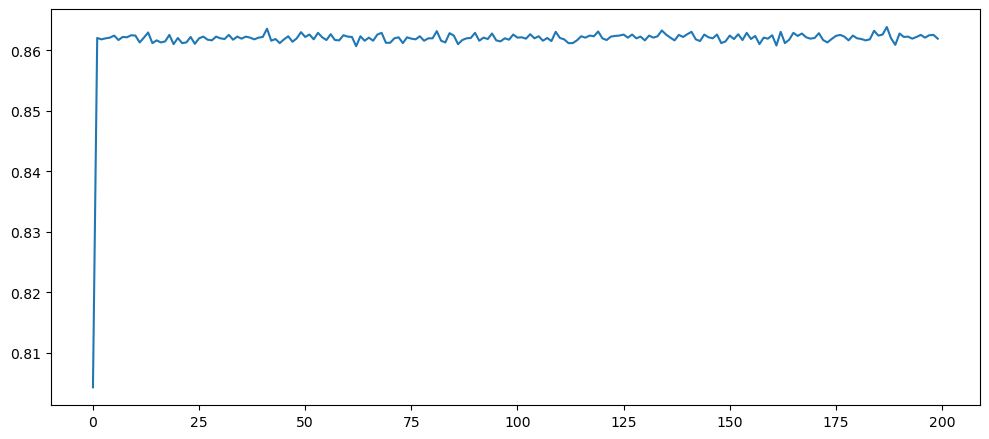

In [122]:
#history
plt.plot(model.history.history['accuracy'])

#model_loss = pd.DataFrame(model.history.history)
#model_loss
#sns.histplot(data = model_loss, x = "accuracy")

In [123]:
#predictions = model.predict(X_test)
#predictions = np.round(predictions).astype(int)
predictions = (model.predict(X_test) > 0.5).astype(int)
from sklearn.metrics import classification_report, confusion_matrix

272/272 [==============================] - 1s 3ms/step


In [124]:
print(classification_report(y_test, predictions))
#print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4797
           1       0.86      0.85      0.85      3895

    accuracy                           0.87      8692
   macro avg       0.87      0.87      0.87      8692
weighted avg       0.87      0.87      0.87      8692



In [44]:
y_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [46]:
predictions.dtype

dtype('int32')

In [51]:
X_test

array([[0.83804875, 0.57667602, 0.25610083, 0.15455885],
       [0.86889863, 0.65038697, 0.17409182, 0.0858548 ],
       [0.72377845, 0.84006908, 0.09425316, 0.19382726],
       ...,
       [0.75876176, 0.93898996, 0.07755718, 0.12268505],
       [0.85222049, 0.55178589, 0.20618941, 0.14955016],
       [0.8397565 , 0.52398096, 0.2154003 , 0.17597292]])

In [132]:
#address = [predictions] 
#X_test_df["id_predicted"] = predictions
#y_test_array = y_test.to_numpy() 
#X_test["id_initial"] = y_test_array
#difference = predictions - y_test_array 
#X_test["difference"] = difference
#X_test.head(50)

# creating a list of index names
#index_values = [1, 2, 3, 4]
index_values = list(range(1, 8693))
   
# creating a list of column names
column_values = ['E_gamma', 'theta_gamma', 
                 'theta_p', 'MM']

# creating the dataframe
X_test_df = pd.DataFrame(data = X_test_unscaled, 
                  index = index_values, 
                  columns = column_values)
X_test_df["id_initial"] = y_test.astype(int)
X_test_df["id_predicted"] = predictions



In [133]:
X_test_df

,E_gamma,theta_gamma,theta_p,MM,id_initial,id_predicted
1,191.649002,77.554001,11.0,997.328003,0,0
2,186.966995,137.098007,8.0,948.179016,1,1
3,218.567001,92.403999,11.0,947.418030,1,1
4,197.582001,136.914001,9.0,931.838989,1,1
5,191.559998,108.833000,12.0,965.838013,0,0
...,...,...,...,...,...,...
8688,189.660004,84.093002,10.0,993.221985,0,0
8689,220.266998,87.461998,9.0,951.192993,1,1
8690,215.854996,84.920998,10.0,959.859985,0,0
8691,194.488007,119.000999,10.0,951.877014,0,1


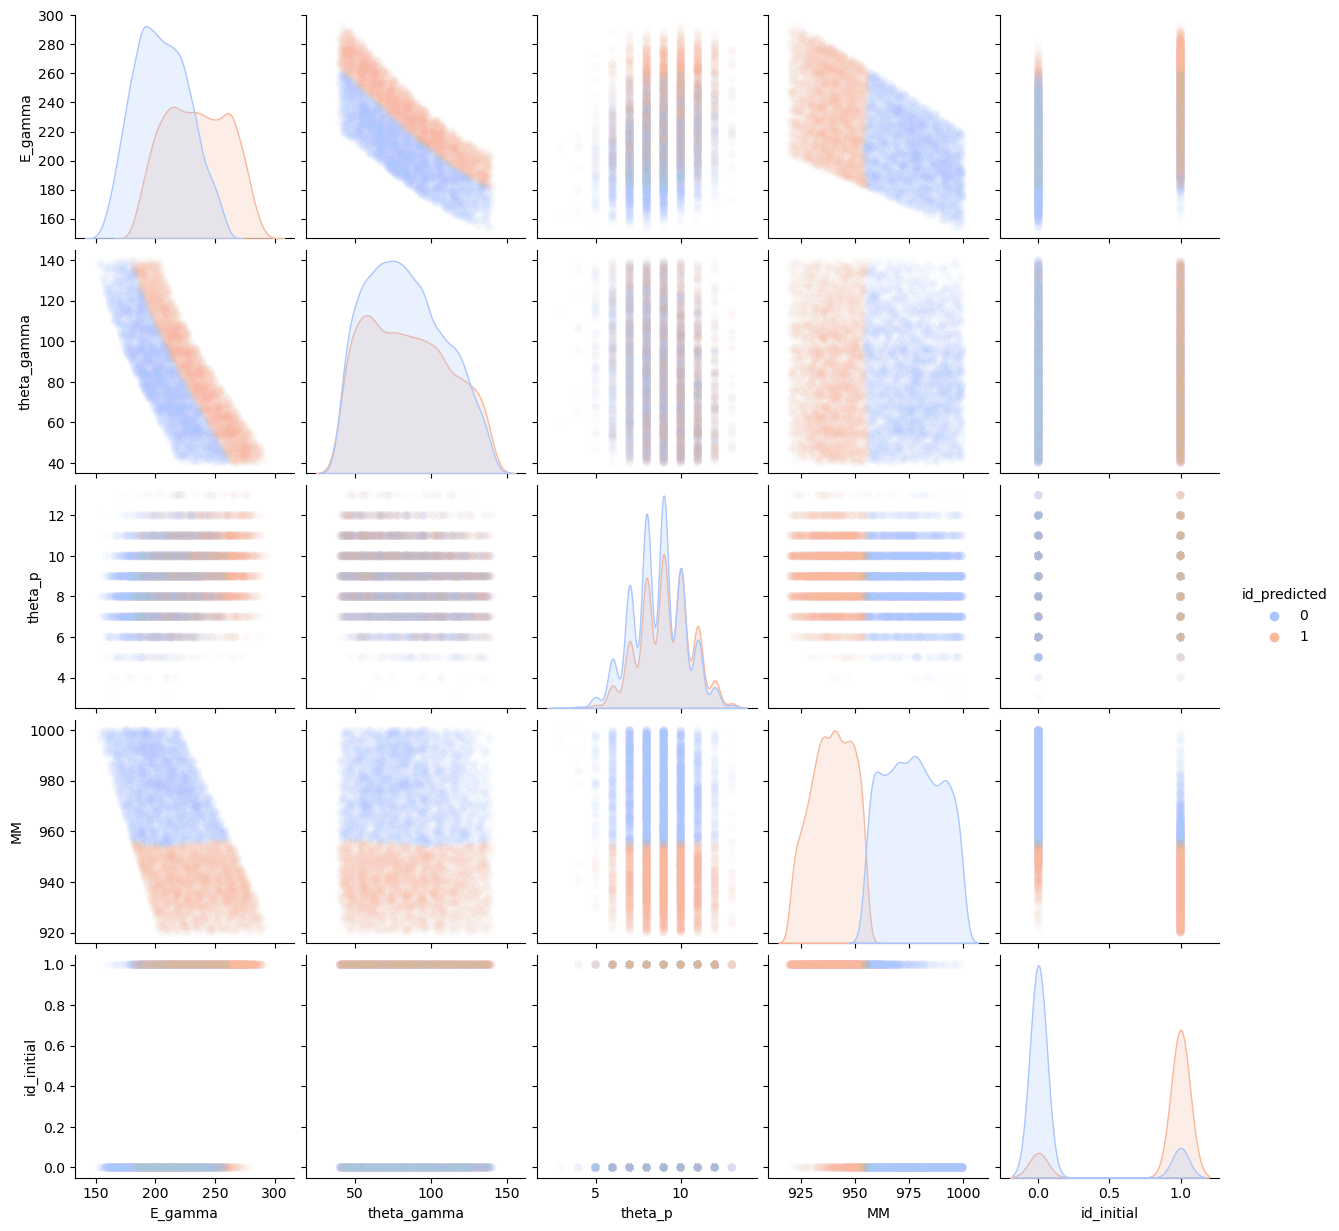

In [127]:
sns.pairplot(X_test_df, hue = "id_predicted",  kind='scatter', plot_kws={'alpha':0.03}, palette='coolwarm')

<AxesSubplot:xlabel='MM', ylabel='theta_gamma'>

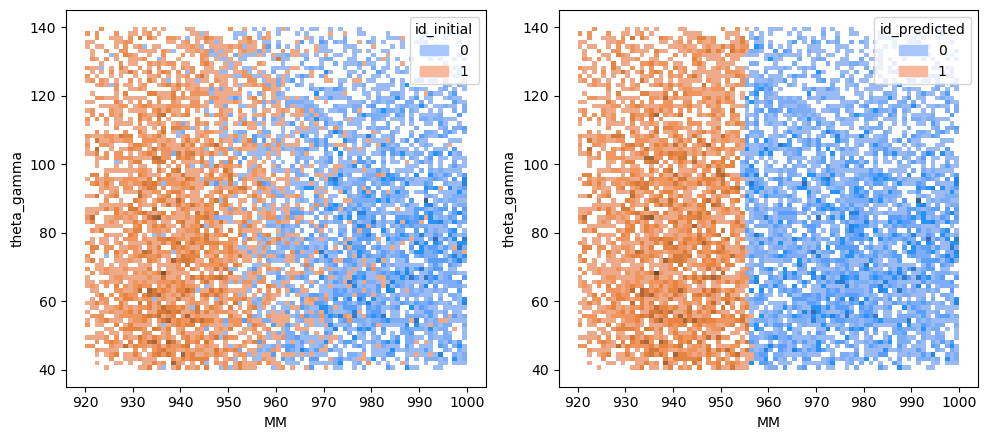

In [129]:
plt.rcParams["figure.figsize"] = [10.0, 4.5]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.histplot(data = X_test_df, x = 'MM', y = 'theta_gamma', hue= 'id_initial', palette='coolwarm', bins = 80, ax=axes[0])
sns.histplot(data = X_test_df, x = 'MM', y = 'theta_gamma', hue= 'id_predicted', palette='coolwarm', bins = 80, ax=axes[1])